In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def edge_mask(img, line_size, blur_value):
    """Convert image to grayscale and extract edges."""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, line_size, blur_value)
    return edges



In [26]:
file_name = "images"
img = cv2.imread(file_name+".jpg")
org_img = np.copy(img)


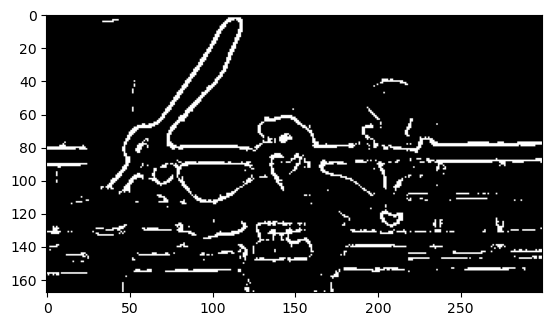

In [28]:

# Define parameters
line_size, blur_value = 5, 7

# Apply edge mask
edges = edge_mask(img, line_size, blur_value)

# Show edges
plt.imshow(edges, cmap="binary")
plt.show()


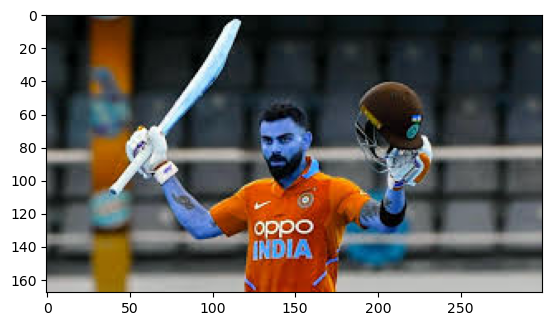

In [30]:
plt.imshow(org_img)
plt.show()

In [32]:

def color_quantization(img, k):
    """Apply K-means clustering to reduce the number of colors."""
    data = np.float32(img).reshape((-1, 3))

    # Define criteria for K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Apply K-means clustering
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    # Reconstruct the image
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result


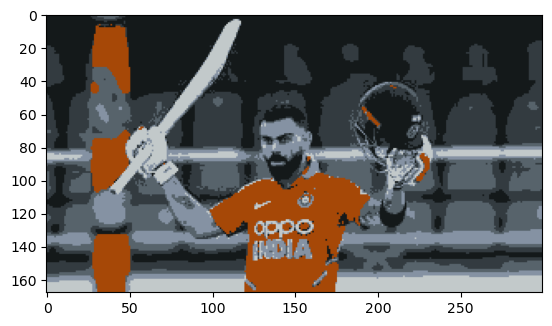

In [34]:

# Apply color quantization
img = color_quantization(img, k=6)

# Show the quantized image
plt.imshow(img)
plt.show()

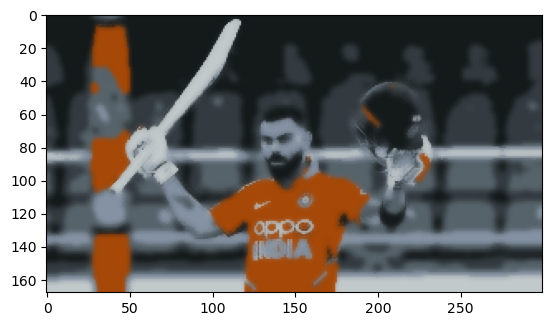

In [37]:

# Apply bilateral filter to smooth the image while keeping edges sharp
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)

# Display the blurred image
plt.imshow(blurred)
plt.show()


In [39]:

def cartoon():
    """Applies a cartoon effect by combining edge detection with bilateral filtering."""
    c = cv2.bitwise_and(blurred, blurred, mask=edges)

    # Display the cartoonified image
    plt.imshow(c)
    plt.title("Cartoonified")
    plt.show()

    # Display the original image
    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()


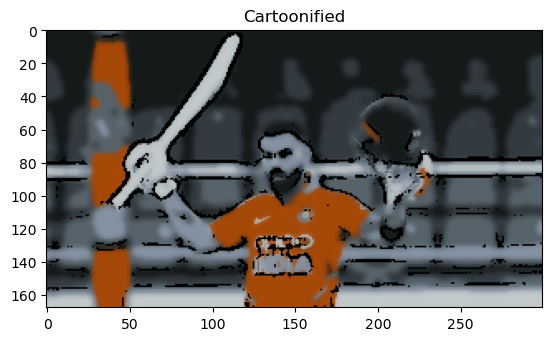

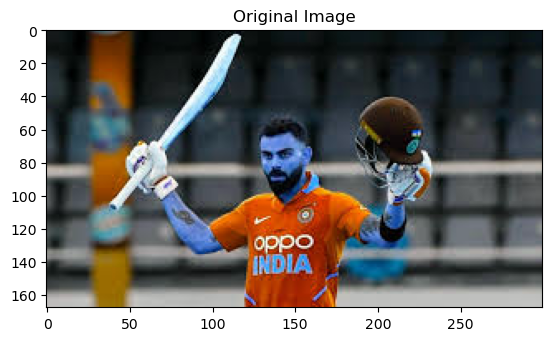

In [41]:
cartoon()